In [9]:
import spectrum
import matplotlib
% matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [37]:
o = spectrum.readSpectrum("../data/sf2outcube_COSMOSC_025.fits.gz")

In [38]:
n = spectrum.readSpectrum("../data/maja/newxskysub/fr_outcube_median_025_C.fits.gz")

In [39]:
# turn zeros into nans again
od = o.data
nd = n.data

od[od == 0.0] = np.nan
nd[nd == 0.0] = np.nan

diff = n.data - o.data
diff[diff == 0.0] = np.nan

In [40]:
diff[diff == 0.0] = np.nan

mm_diff = np.nanmedian( np.nanmedian( diff, axis=2), axis=1)

mm_o = np.nanmedian( np.nanmedian( od, axis=2), axis=1)
mm_n = np.nanmedian( np.nanmedian( nd, axis=2), axis=1)

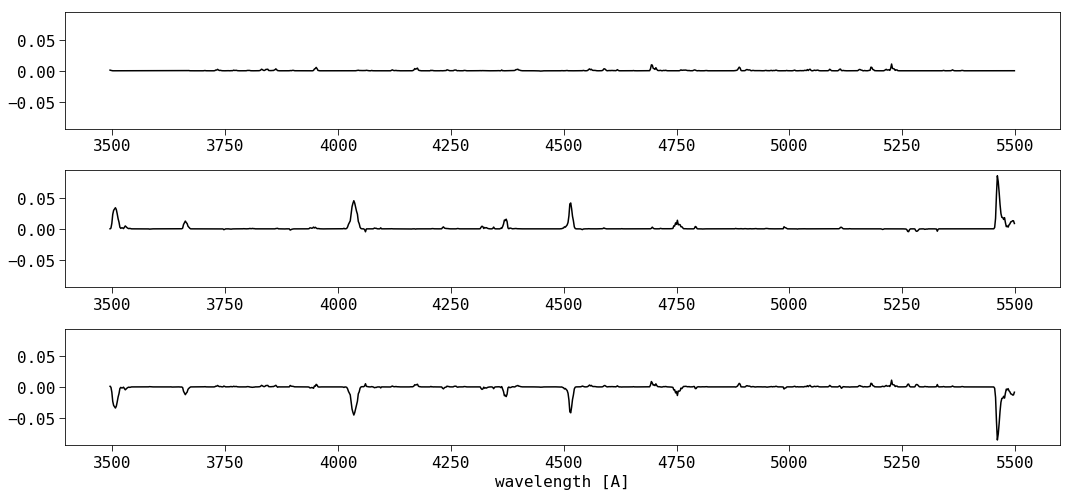

In [43]:
f = plt.figure(figsize=[15,7])
ax1 = plt.subplot(311)
plt.plot(o.grid(), mm_o, label='original')

ax2 = plt.subplot(312, sharex=ax1, sharey=ax1)
plt.plot(n.grid(), mm_n, label='new xskysub')

ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(o.grid(), mm_o-mm_n, label='difference')
plt.xlabel("wavelength [A]")
#plt.xlim([4000.,4100.])
f.tight_layout()